In [1]:
!pip3 install torch torchvision

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from infer import InferenceHelper
from PIL import Image
import matplotlib.pyplot as plt

Loading base model ()...

Using cache found in /home/cg/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


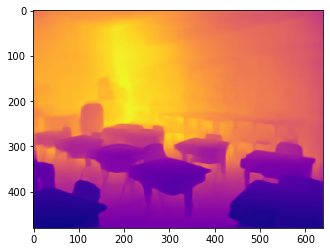

In [4]:
infer_helper = InferenceHelper(dataset='nyu')

# predict depth of a single pillow image
img = Image.open("test_imgs/classroom__rgb_00283.jpg")  # any rgb pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)

plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()

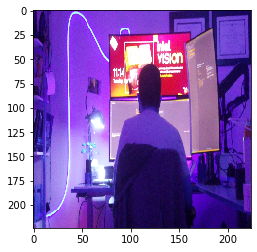

RuntimeError: Given groups=1, weight of size [256, 128, 1, 1], expected input[1, 48, 112, 112] to have 128 channels, but got 48 channels instead

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
import cv2

infer_helper = InferenceHelper(dataset='nyu')

capture = cv2.VideoCapture("http://192.168.1.79:8080/stream/video.mjpeg")

while(True):
    clear_output(wait=True)
    ret, frame = capture.read()
    frame = cv2.resize(frame, (224, 224))
    #cv2.imshow('livestream', frame)
    plt.imshow(frame)
    plt.show()
    if cv2.waitKey(1) == ord("q"):
        break
    bin_centers, predicted_depth = infer_helper.predict_pil(frame)
    plt.imshow(predicted_depth[0][0], cmap='plasma')

capture.release()
cv2.destroyAllWindows()

In [ ]:
infer_helper = InferenceHelper(dataset='nyu')

# predict depth of a single pillow image
img = Image.open("test_imgs/classroom__rgb_00283.jpg")  # any rgb pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)

plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()